# 와인 품질 분류 경진대회 실습

목표 : 와인의 품질을 예측하는 분류 지도학습 인공지능을 개발하는 실습

대회 페이지 : https://dacon.io/competitions/open/235610/

예제 코드 : https://dacon.io/competitions/open/235610/codeshare/4221 를 참고하여 변형하였습니다.

# LIBRARY 로딩

In [41]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline

plt.style.use('fivethirtyeight')

# DATA 불러오기

In [42]:
#Load Data!
train= pd.read_csv("data/train.csv", index_col=None)
test = pd.read_csv("data/test.csv", index_col=None)
submission= pd.read_csv("data/sample_submission.csv")

In [43]:
train

,index,quality,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,type
0,0,5,5.6,0.695,0.06,6.8,0.042,9.0,84.0,0.99432,3.44,0.44,10.2,white
1,1,5,8.8,0.610,0.14,2.4,0.067,10.0,42.0,0.99690,3.19,0.59,9.5,red
2,2,5,7.9,0.210,0.39,2.0,0.057,21.0,138.0,0.99176,3.05,0.52,10.9,white
3,3,6,7.0,0.210,0.31,6.0,0.046,29.0,108.0,0.99390,3.26,0.50,10.8,white
4,4,6,7.8,0.400,0.26,9.5,0.059,32.0,178.0,0.99550,3.04,0.43,10.9,white
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5492,5492,5,7.7,0.150,0.29,1.3,0.029,10.0,64.0,0.99320,3.35,0.39,10.1,white
5493,5493,6,6.3,0.180,0.36,1.2,0.034,26.0,111.0,0.99074,3.16,0.51,11.0,white
5494,5494,7,7.8,0.150,0.34,1.1,0.035,31.0,93.0,0.99096,3.07,0.72,11.3,white
5495,5495,5,6.6,0.410,0.31,1.6,0.042,18.0,101.0,0.99195,3.13,0.41,10.5,white


학습 데이터셋 변수 설명 

(https://dacon.io/competitions/open/235610/data 참고)

* index 구분자
* quality 품질
* fixed acidity 산도
* volatile acidity 휘발성산
* citric acid 시트르산
* residual sugar 잔당 : 발효 후 와인 속에 남아있는 당분
* chlorides 염화물
* free sulfur dioxide 독립 이산화황
* total sulfur dioxide 총 이산화황
* density 밀도
* pH 수소이온농도
* sulphates 황산염
* alcohol 도수
* type 종류

In [44]:
test

,index,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,type
0,0,9.0,0.31,0.48,6.60,0.043,11.0,73.0,0.99380,2.90,0.38,11.6,white
1,1,13.3,0.43,0.58,1.90,0.070,15.0,40.0,1.00040,3.06,0.49,9.0,red
2,2,6.5,0.28,0.27,5.20,0.040,44.0,179.0,0.99480,3.19,0.69,9.4,white
3,3,7.2,0.15,0.39,1.80,0.043,21.0,159.0,0.99480,3.52,0.47,10.0,white
4,4,6.8,0.26,0.26,2.00,0.019,23.5,72.0,0.99041,3.16,0.47,11.8,white
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,995,7.1,0.59,0.02,2.30,0.082,24.0,94.0,0.99744,3.55,0.53,9.7,red
996,996,8.7,0.15,0.30,1.60,0.046,29.0,130.0,0.99420,3.22,0.38,9.8,white
997,997,8.8,0.66,0.26,1.70,0.074,4.0,23.0,0.99710,3.15,0.74,9.2,red
998,998,7.0,0.42,0.19,2.30,0.071,18.0,36.0,0.99476,3.39,0.56,10.9,red


테스트 데이터셋은 quality 변수가 제외되어 있음

In [45]:
submission

,index,quality
0,0,0
1,1,0
2,2,0
3,3,0
4,4,0
...,...,...
995,995,0
996,996,0
997,997,0
998,998,0


서브미션 파일은 테스트 데이터셋에 대한 quality를 예측하여 제출해야 함

In [46]:
#drop index column
train= train.drop(['index'],axis=1)
test= test.drop(['index'],axis=1)
train.shape, test.shape, submission.shape

((5497, 13), (1000, 12), (1000, 2))

# 탐색적 데이터 분석(EDA)

## pandas의 기본 요약 함수 활용 확인하기

In [47]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5497 entries, 0 to 5496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   quality               5497 non-null   int64  
 1   fixed acidity         5497 non-null   float64
 2   volatile acidity      5497 non-null   float64
 3   citric acid           5497 non-null   float64
 4   residual sugar        5497 non-null   float64
 5   chlorides             5497 non-null   float64
 6   free sulfur dioxide   5497 non-null   float64
 7   total sulfur dioxide  5497 non-null   float64
 8   density               5497 non-null   float64
 9   pH                    5497 non-null   float64
 10  sulphates             5497 non-null   float64
 11  alcohol               5497 non-null   float64
 12  type                  5497 non-null   object 
dtypes: float64(11), int64(1), object(1)
memory usage: 558.4+ KB


In [48]:
train.describe(include='all')

,quality,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,type
count,5497.000000,5497.000000,5497.000000,5497.000000,5497.000000,5497.000000,5497.000000,5497.000000,5497.000000,5497.000000,5497.000000,5497.000000,5497
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,white
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4159
mean,5.818992,7.210115,0.338163,0.318543,5.438075,0.055808,30.417682,115.566491,0.994673,3.219502,0.530524,10.504918,NaN
std,0.870311,1.287579,0.163224,0.145104,4.756676,0.034653,17.673881,56.288223,0.003014,0.160713,0.149396,1.194524,NaN
min,3.000000,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.740000,0.220000,8.000000,NaN
25%,5.000000,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,78.000000,0.992300,3.110000,0.430000,9.500000,NaN
50%,6.000000,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994800,3.210000,0.510000,10.300000,NaN
75%,6.000000,7.700000,0.400000,0.390000,8.100000,0.064000,41.000000,155.000000,0.996930,3.320000,0.600000,11.300000,NaN


피쳐들의 스케일(단위)가 다르기 때문에 추후에'표준화' 진행합니다. 

e.g. ```density```와 ```pH```는 단위가 다르죠 :)

## pandas_profiling 라이브러리 활용하여 확인하기

In [49]:
#import pandas_profiling as pp
#report = train.profile_report()
#report.to_file("profiling.html")

pandas profiling 으로 간단하게 훑어봅니다.

* Overview에서 각 피쳐, 상관관계, 결측값 등의 정보를 얻을 수 있습니다. 
    * 각 피쳐의 Toggle detais를 눌러 상세히 봅니다.
* Warnings(28) 탭에서 상관관계에 대한 정보를 얻을 수 있습니다.

## 직접 시각화해서 확인하기

quality
6    2416
5    1788
7     924
4     186
8     152
3      26
9       5
Name: count, dtype: int64


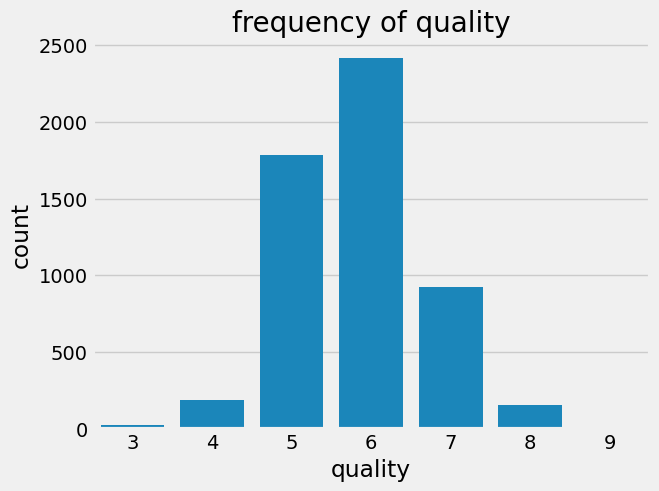

In [50]:
print(train['quality'].value_counts())
sns.countplot(x=train['quality']);
plt.title("frequency of quality", fontsize=20);

6등급의 와인이 가장 많이 있네요!

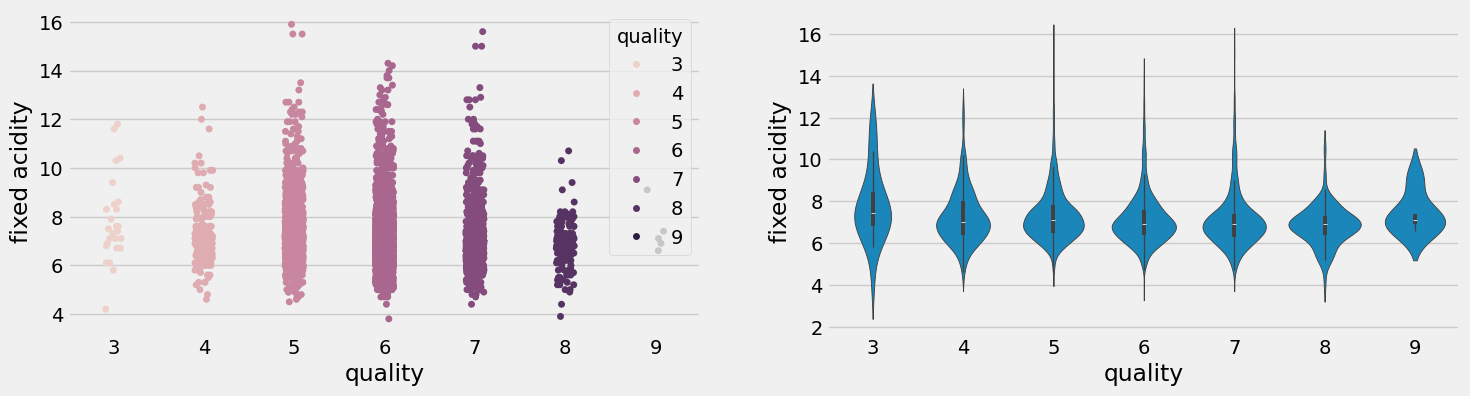

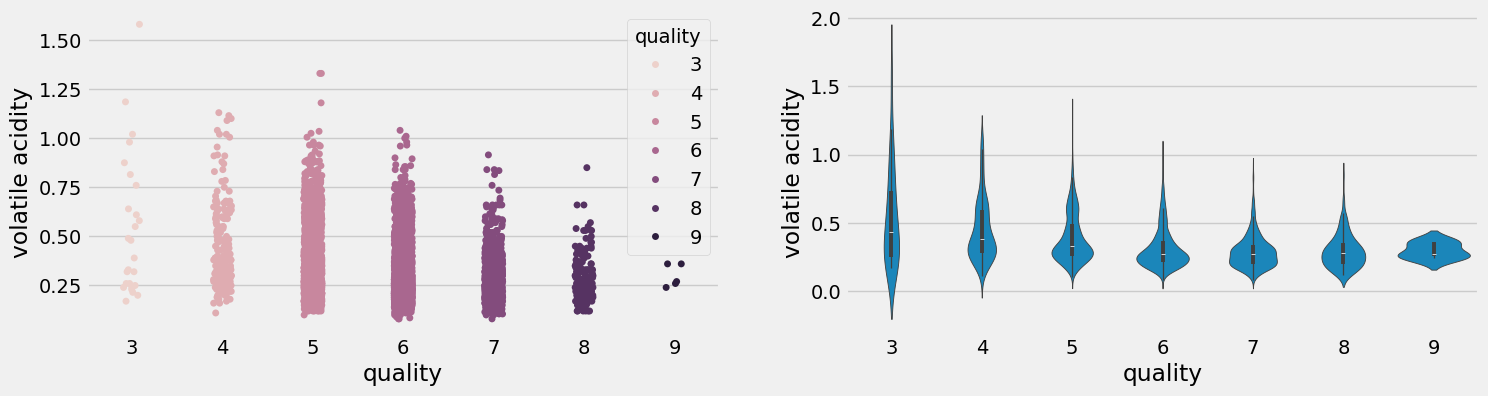

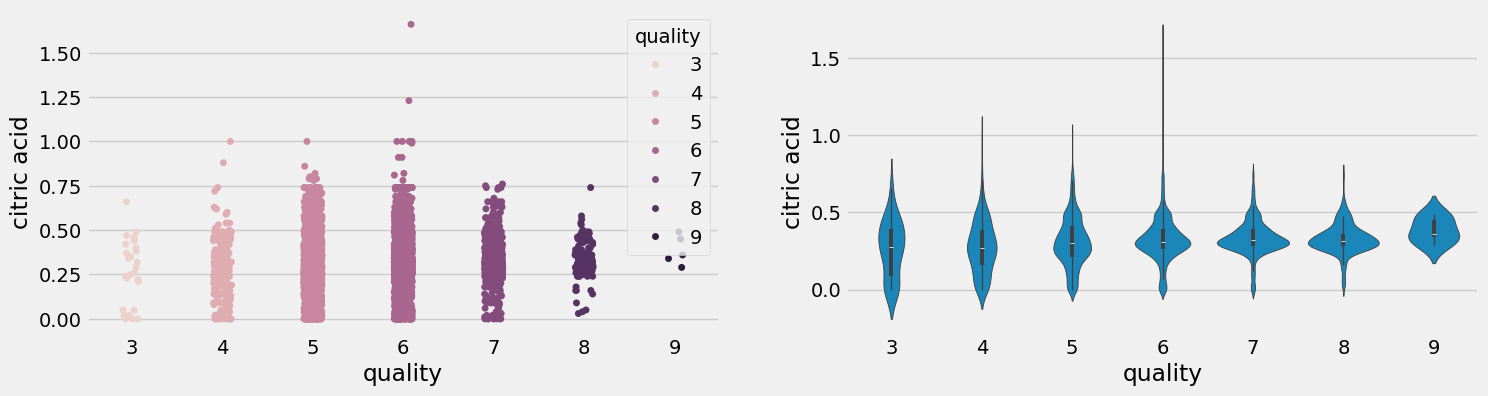

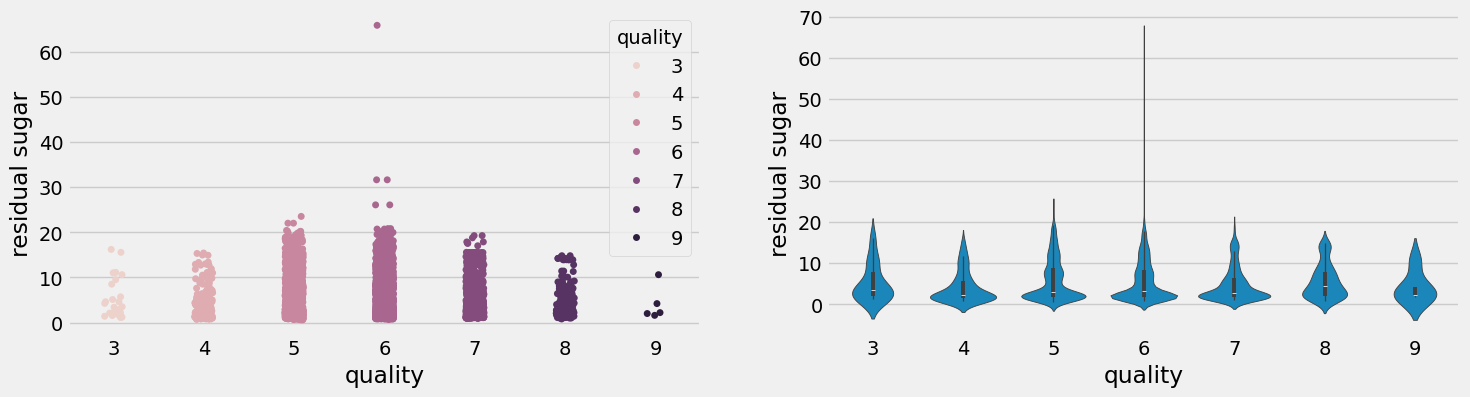

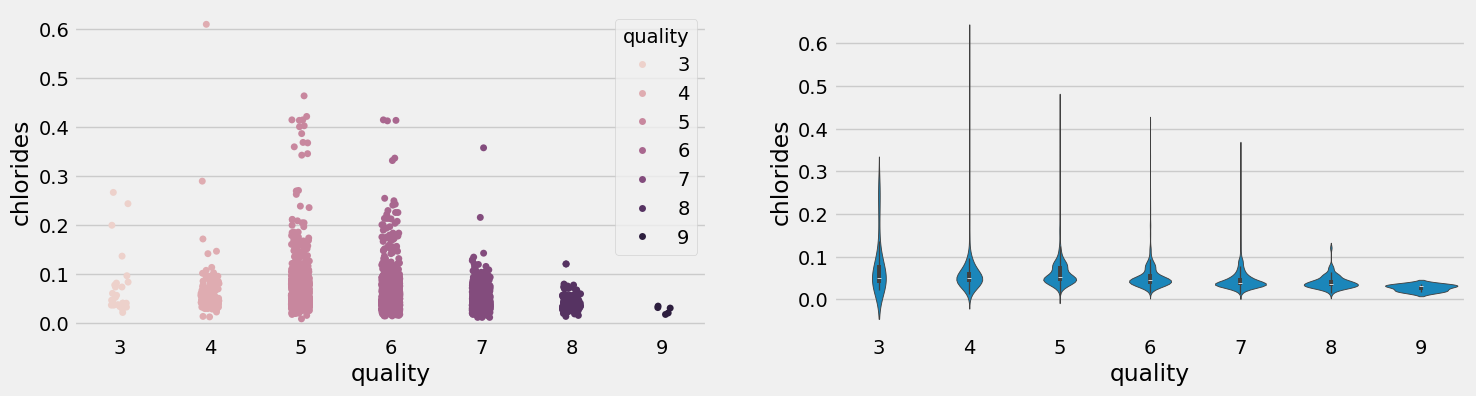

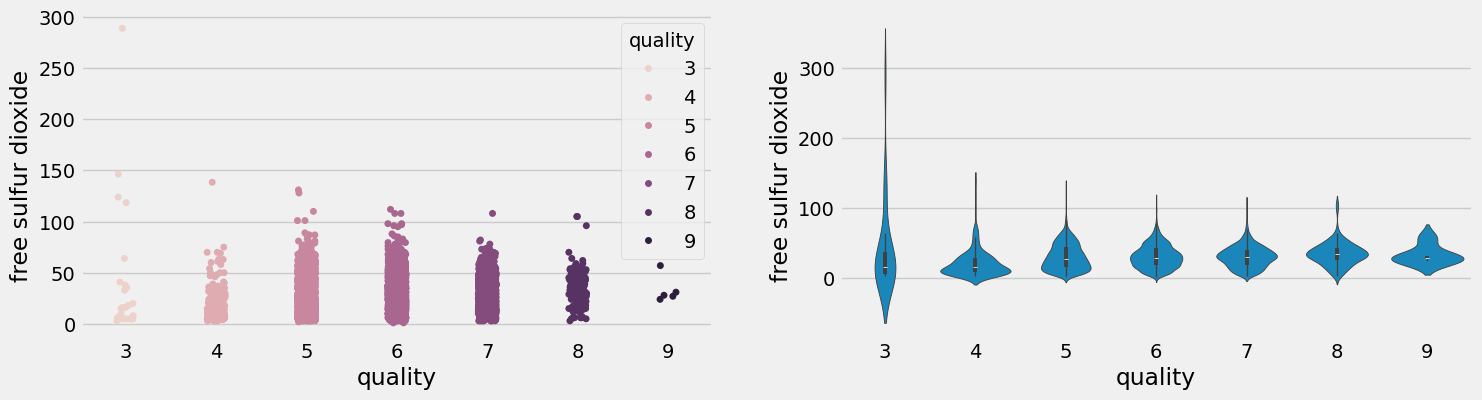

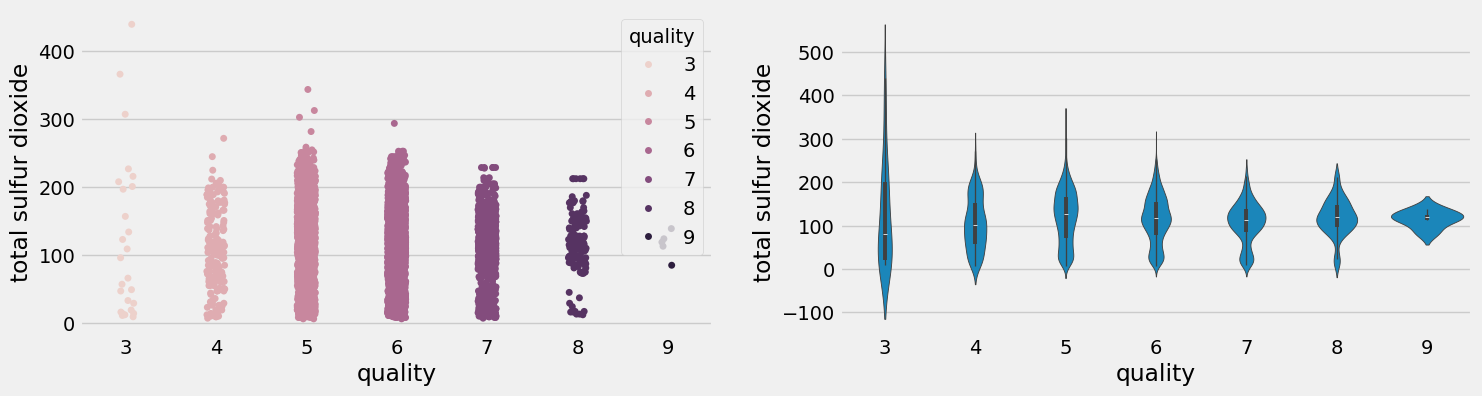

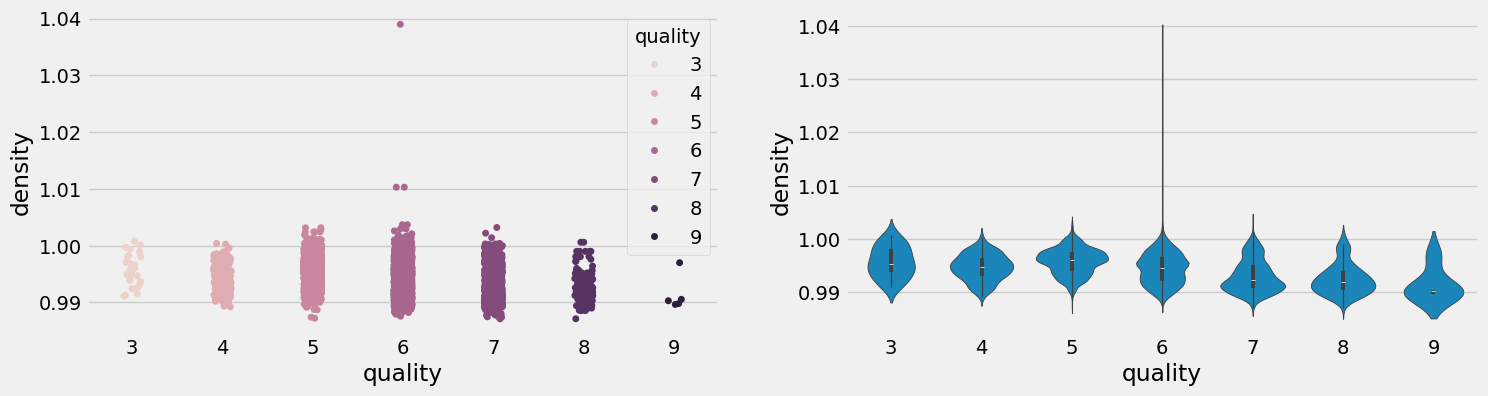

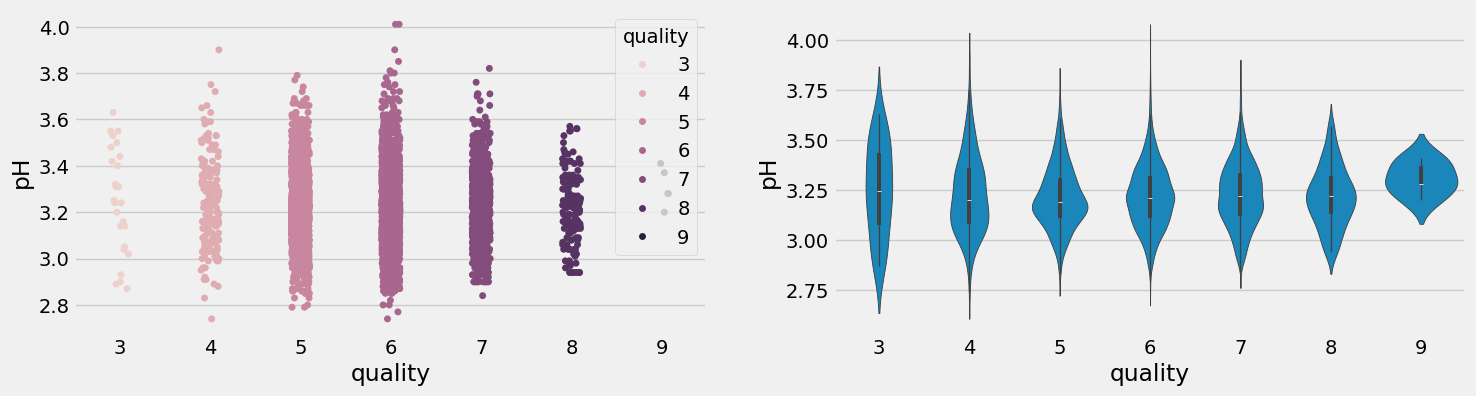

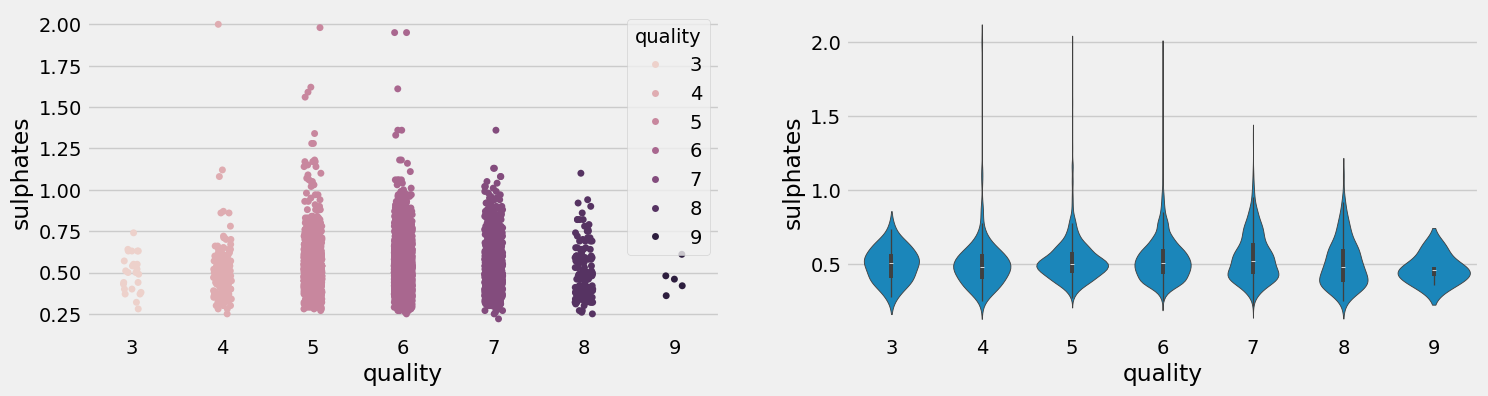

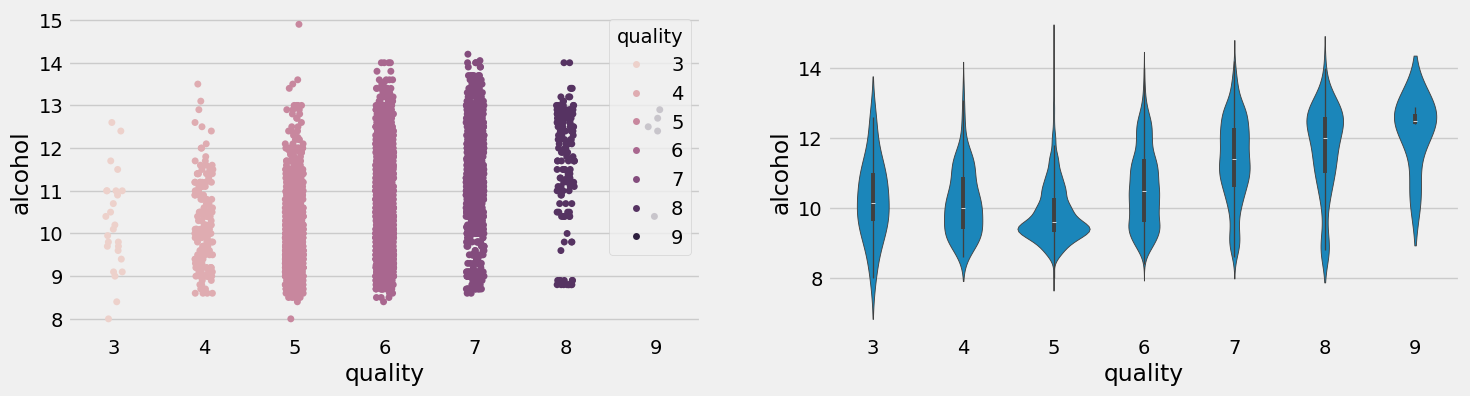

In [51]:
#distribution by 'quality'
numerical_columns = train.select_dtypes(exclude='object').columns.tolist()
numerical_columns.remove('quality')
def show_dist_plot(df, columns):
    for column in columns:
        f, ax = plt.subplots(1,2,figsize=(16,4))
        sns.stripplot(x=df['quality'],y=df[column], ax=ax[0],hue=df['quality'])
        sns.violinplot(data=df, x='quality', y=column, ax=ax[1])
        
show_dist_plot(train, numerical_columns)

모든 피쳐들의 의미를 헤아리고, 유의미한 피쳐를 찾는 것은 분석에 있어 큰 도움이 됩니다.<br>
그러나, 피쳐의 수가 50개가 넘는다면? 모든 피쳐들을 헤아리기 힘들겠죠! <br>
그래서 피쳐들이 많을 때 ```train.corr()``` 상관관계를 통해서 힌트를 얻곤 합니다.

<Axes: >

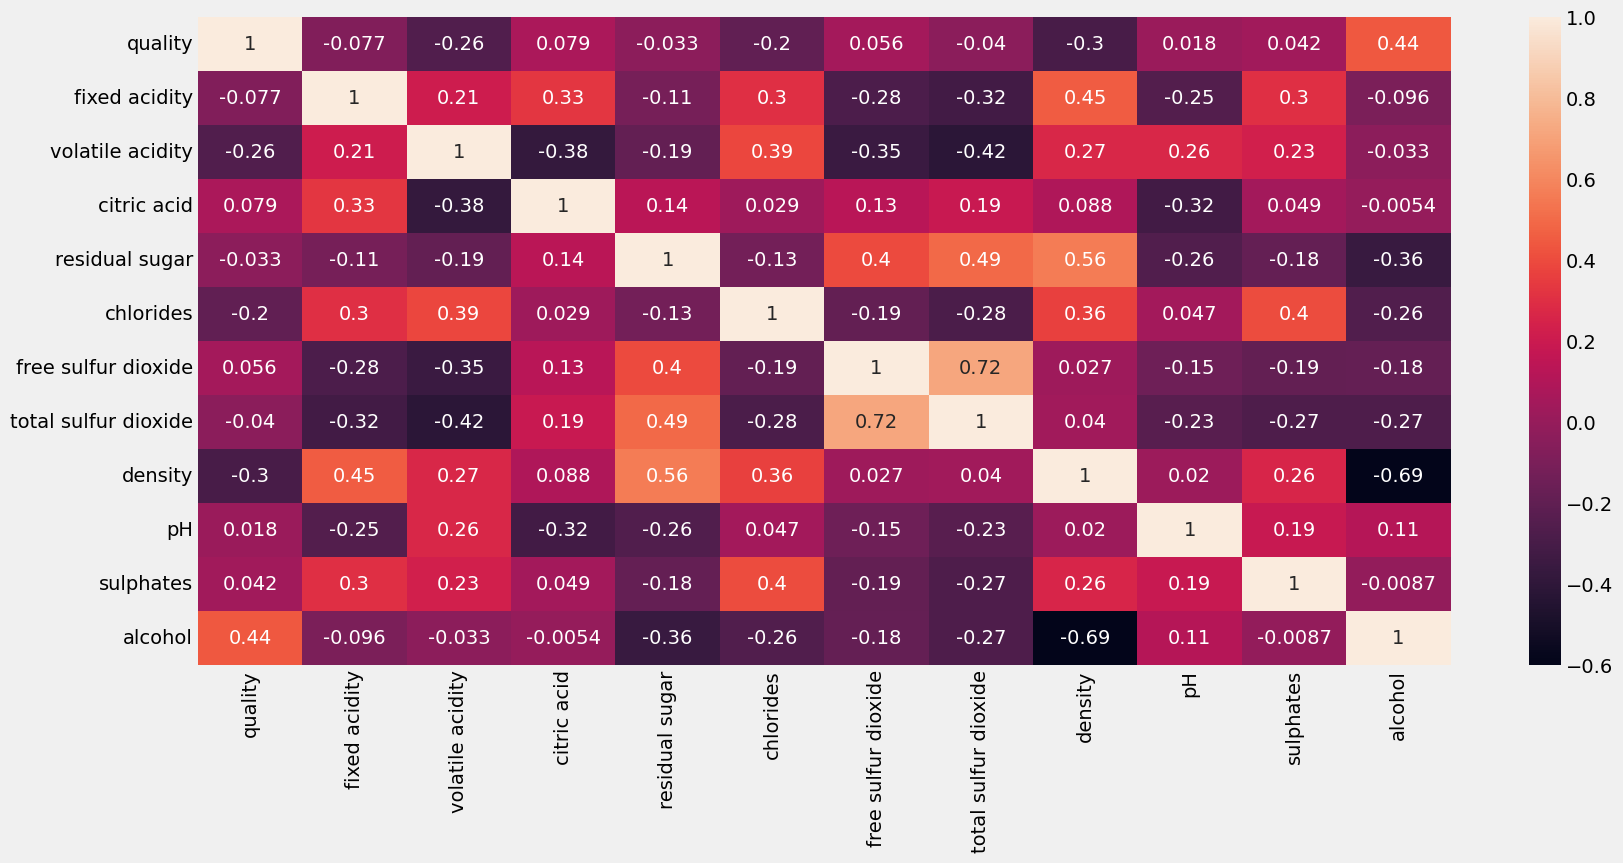

In [52]:
plt.figure(figsize=(18,8))
train_corr = train.copy()
train_corr.drop(['type'],axis=1,inplace=True)
corr= train_corr.corr()
sns.heatmap(corr, annot=True, square=False, vmin=-.6, vmax=1.0)

**주의! 상관관계와 인관관계는 다릅니다 **  <br>

분포에서의 관계가 있음을 알려주는 것이지, 원인과 결과의 관계는 아니라는 것! 기억해주세요 :)

관련 문서: https://ko.wikipedia.org/wiki/상관관계와_인과관계

# 데이터 전처리

In [53]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

#Standardscaler
ss= StandardScaler()
ss.fit(train[numerical_columns])
train[numerical_columns] = ss.transform(train[numerical_columns])
test[numerical_columns] = ss.transform(test[numerical_columns])

#factorize
le = LabelEncoder()
le.fit(train['type'])
train['type'] = le.transform(train['type'])
test['type'] = le.transform(test['type'])

In [54]:
train.head(3)

,quality,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,type
0,5,-1.250611,2.186377,-1.78194,0.286345,-0.398500,-1.211937,-0.560852,-0.117252,1.372128,-0.605988,-0.255287,1
1,5,1.234899,1.665574,-1.23056,-0.638755,0.322998,-1.155351,-1.307080,0.738864,-0.183584,0.398147,-0.841348,0
2,5,0.535849,-0.785265,0.49250,-0.722855,0.034399,-0.532907,0.398583,-0.966732,-1.054782,-0.070450,0.330774,1


In [55]:
test.head(3)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,type
0,1.390243,-0.172555,1.112802,0.244295,-0.369640,-1.098765,-0.756293,-0.289803,-1.988209,-1.007643,0.916835,1
1,4.730148,0.562696,1.802026,-0.743880,0.409577,-0.872422,-1.342614,1.900261,-0.992553,-0.271277,-1.259963,0
2,-0.551562,-0.356368,-0.334569,-0.050055,-0.456220,0.768567,1.127044,0.042025,-0.183584,1.067570,-0.925071,1


StandardScaler를 통해서 **표준화** 작업을 진행하였고, <br>
type을 0과 1로 변환해주었습니다. ML에서는 str은 들어가지 않으니 변환은 꼭! <br>
이외에도 encoding에는 ```pd.get_dummies()```, ```labelEncoder``` 등이 있습니다.

# 모델링(학습)

## 라이브러리

In [56]:
#Library
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression, Ridge
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.metrics import accuracy_score

## 데이터셋 구조화(X, Y 나누기)

In [57]:
X = train.drop(['quality'],axis=1)
y = train.quality

In [58]:
X

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,type
0,-1.250611,2.186377,-1.781940,0.286345,-0.398500,-1.211937,-0.560852,-0.117252,1.372128,-0.605988,-0.255287,1
1,1.234899,1.665574,-1.230560,-0.638755,0.322998,-1.155351,-1.307080,0.738864,-0.183584,0.398147,-0.841348,0
2,0.535849,-0.785265,0.492500,-0.722855,0.034399,-0.532907,0.398583,-0.966732,-1.054782,-0.070450,0.330774,1
3,-0.163201,-0.785265,-0.058879,0.118145,-0.283060,-0.080221,-0.134436,-0.256620,0.252016,-0.204334,0.247051,1
4,0.458177,0.378883,-0.403491,0.854020,0.092119,0.089537,1.109276,0.274305,-1.117010,-0.672931,0.330774,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5492,0.380505,-1.152890,-0.196724,-0.870030,-0.773678,-1.155351,-0.916198,-0.488900,0.812072,-0.940700,-0.339010,1
5493,-0.706906,-0.969078,0.285733,-0.891055,-0.629379,-0.249978,-0.081134,-1.305196,-0.370269,-0.137392,0.414497,1
5494,0.458177,-1.152890,0.147888,-0.912080,-0.600519,0.032951,-0.400946,-1.232194,-0.930325,1.268397,0.665666,1
5495,-0.473889,0.440154,-0.058879,-0.806955,-0.398500,-0.702665,-0.258808,-0.903684,-0.556954,-0.806815,-0.004118,1


In [59]:
y

0       5
1       5
2       5
3       6
4       6
       ..
5492    5
5493    6
5494    7
5495    5
5496    6
Name: quality, Length: 5497, dtype: int64

## 데이터셋 구조화(훈련/검증 데이터셋 나누기)

In [60]:
X_train, X_validation, y_train, y_validation = train_test_split(X,y,test_size=.2, random_state=42, stratify=y)
X_train.shape, y_train.shape, X_validation.shape, y_validation.shape

((4397, 12), (4397,), (1100, 12), (1100,))

* ```test_size : 0.2```   train과 test를 8:2로 구분한다는 의미!
* ```random_state : 42``` 같은 값으로 나오게 하기 위한 Seed 설정! 

X_train과 X_validation에서 type을 제외한 12개의 Feature이 있는 것을 볼 수 있습니다.

In [61]:
X_train

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,type
373,0.380505,0.011258,1.802026,1.190419,-0.485079,0.598809,0.629559,1.037509,-0.992553,-0.271277,-1.594855,1
1703,-0.163201,-0.111284,-0.196724,0.454545,-0.889118,0.259294,0.149841,-1.013188,-0.432497,0.799801,1.921511,1
4521,-1.405956,-0.295097,0.423578,-0.891055,-0.773678,0.032951,0.291979,-1.899168,0.376473,-1.141527,1.586619,1
378,-1.172939,-1.214161,-0.127802,-0.008005,-0.311920,-0.249978,-0.187738,0.005524,0.625386,-0.539046,-1.008794,1
3489,-0.240873,1.297948,-1.161638,-0.680805,0.582737,-0.646079,-1.342614,0.473401,1.185442,0.398147,-0.339010,0
...,...,...,...,...,...,...,...,...,...,...,...,...
5223,0.069816,0.256342,-0.748103,-0.722855,0.698176,-1.325109,-1.431451,0.473401,0.687615,-0.405161,-0.841348,0
1794,-0.784578,-0.723994,-0.265647,-0.680805,-0.456220,-0.363150,0.167608,-0.986641,-0.183584,-0.338219,-0.004118,1
4047,-0.240873,-0.111284,-0.403491,0.601720,-0.081041,0.089537,1.144811,0.606133,0.189787,-0.137392,-1.092517,1
325,1.545588,-1.152890,2.491250,-0.806955,-0.283060,-0.476321,0.256445,0.042025,-1.241467,-0.539046,-0.087841,1


In [62]:
y_train

373     5
1703    7
4521    6
378     5
3489    5
       ..
5223    5
1794    6
4047    6
325     6
4308    4
Name: quality, Length: 4397, dtype: int64

## 모델 학습(훈련 데이터셋)

In [63]:
model1 = LogisticRegression(max_iter=1000)
model1.fit(X_train, y_train)

/opt/homebrew/lib/python3.13/site-packages/sklearn/linear_model/_linear_loss.py:203: RuntimeWarning: divide by zero encountered in matmul
  raw_prediction = X @ weights.T + intercept  # ndarray, likely C-contiguous
/opt/homebrew/lib/python3.13/site-packages/sklearn/linear_model/_linear_loss.py:203: RuntimeWarning: overflow encountered in matmul
  raw_prediction = X @ weights.T + intercept  # ndarray, likely C-contiguous
/opt/homebrew/lib/python3.13/site-packages/sklearn/linear_model/_linear_loss.py:203: RuntimeWarning: invalid value encountered in matmul
  raw_prediction = X @ weights.T + intercept  # ndarray, likely C-contiguous
/opt/homebrew/lib/python3.13/site-packages/sklearn/linear_model/_linear_loss.py:336: RuntimeWarning: divide by zero encountered in matmul
  grad[:, :n_features] = grad_pointwise.T @ X + l2_reg_strength * weights
/opt/homebrew/lib/python3.13/site-packages/sklearn/linear_model/_linear_loss.py:336: RuntimeWarning: overflow encountered in matmul
  grad[:, :n_featu

LogisticRegression(max_iter=1000)

In [64]:
X_train

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,type
373,0.380505,0.011258,1.802026,1.190419,-0.485079,0.598809,0.629559,1.037509,-0.992553,-0.271277,-1.594855,1
1703,-0.163201,-0.111284,-0.196724,0.454545,-0.889118,0.259294,0.149841,-1.013188,-0.432497,0.799801,1.921511,1
4521,-1.405956,-0.295097,0.423578,-0.891055,-0.773678,0.032951,0.291979,-1.899168,0.376473,-1.141527,1.586619,1
378,-1.172939,-1.214161,-0.127802,-0.008005,-0.311920,-0.249978,-0.187738,0.005524,0.625386,-0.539046,-1.008794,1
3489,-0.240873,1.297948,-1.161638,-0.680805,0.582737,-0.646079,-1.342614,0.473401,1.185442,0.398147,-0.339010,0
...,...,...,...,...,...,...,...,...,...,...,...,...
5223,0.069816,0.256342,-0.748103,-0.722855,0.698176,-1.325109,-1.431451,0.473401,0.687615,-0.405161,-0.841348,0
1794,-0.784578,-0.723994,-0.265647,-0.680805,-0.456220,-0.363150,0.167608,-0.986641,-0.183584,-0.338219,-0.004118,1
4047,-0.240873,-0.111284,-0.403491,0.601720,-0.081041,0.089537,1.144811,0.606133,0.189787,-0.137392,-1.092517,1
325,1.545588,-1.152890,2.491250,-0.806955,-0.283060,-0.476321,0.256445,0.042025,-1.241467,-0.539046,-0.087841,1


In [65]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

# 1. Logistic Regression
modelname = "LogisticRegression"
model1 = LogisticRegression(max_iter=1000)
model1.fit(X_train, y_train)
ypred_validation = model1.predict(X_validation)
print(modelname, "Validation Accuracy Score : ", accuracy_score(y_validation, ypred_validation))

# 2. Decision Tree
modelname = "DecisionTree"
model2 = DecisionTreeClassifier()
model2.fit(X_train, y_train)
ypred_validation = model2.predict(X_validation)
print(modelname, "Validation Accuracy Score : ", accuracy_score(y_validation, ypred_validation))

# 3. Random Forest
modelname = "RandomForest"
model3 = RandomForestClassifier()
model3.fit(X_train, y_train)
ypred_validation = model3.predict(X_validation)
print(modelname, "Validation Accuracy Score : ", accuracy_score(y_validation, ypred_validation))

# 4. Gradient Boosting
modelname = "GradientBoosting"
model4 = GradientBoostingClassifier()
model4.fit(X_train, y_train)
ypred_validation = model4.predict(X_validation)
print(modelname, "Validation Accuracy Score : ", accuracy_score(y_validation, ypred_validation))

# 5. AdaBoost
modelname = "AdaBoost"
model5 = AdaBoostClassifier()
model5.fit(X_train, y_train)
ypred_validation = model5.predict(X_validation)
print(modelname, "Validation Accuracy Score : ", accuracy_score(y_validation, ypred_validation))

# 6. K-Nearest Neighbors
modelname = "KNN"
model6 = KNeighborsClassifier(n_neighbors=5)
model6.fit(X_train, y_train)
ypred_validation = model6.predict(X_validation)
print(modelname, "Validation Accuracy Score : ", accuracy_score(y_validation, ypred_validation))

# 7. Support Vector Machine
modelname = "SVM"
model7 = SVC()
model7.fit(X_train, y_train)
ypred_validation = model7.predict(X_validation)
print(modelname, "Validation Accuracy Score : ", accuracy_score(y_validation, ypred_validation))

# 8. Naive Bayes
modelname = "NaiveBayes"
model8 = GaussianNB()
model8.fit(X_train, y_train)
ypred_validation = model8.predict(X_validation)
print(modelname, "Validation Accuracy Score : ", accuracy_score(y_validation, ypred_validation))

# 9. Multi-Layer Perceptron (Neural Network)
modelname = "MLP"
model9 = MLPClassifier(hidden_layer_sizes=(100,), max_iter=500)
model9.fit(X_train, y_train)
ypred_validation = model9.predict(X_validation)
print(modelname, "Validation Accuracy Score : ", accuracy_score(y_validation, ypred_validation))

/opt/homebrew/lib/python3.13/site-packages/sklearn/linear_model/_linear_loss.py:203: RuntimeWarning: divide by zero encountered in matmul
  raw_prediction = X @ weights.T + intercept  # ndarray, likely C-contiguous
/opt/homebrew/lib/python3.13/site-packages/sklearn/linear_model/_linear_loss.py:203: RuntimeWarning: overflow encountered in matmul
  raw_prediction = X @ weights.T + intercept  # ndarray, likely C-contiguous
/opt/homebrew/lib/python3.13/site-packages/sklearn/linear_model/_linear_loss.py:203: RuntimeWarning: invalid value encountered in matmul
  raw_prediction = X @ weights.T + intercept  # ndarray, likely C-contiguous
/opt/homebrew/lib/python3.13/site-packages/sklearn/linear_model/_linear_loss.py:336: RuntimeWarning: divide by zero encountered in matmul
  grad[:, :n_features] = grad_pointwise.T @ X + l2_reg_strength * weights
/opt/homebrew/lib/python3.13/site-packages/sklearn/linear_model/_linear_loss.py:336: RuntimeWarning: overflow encountered in matmul
  grad[:, :n_featu

LogisticRegression Validation Accuracy Score :  0.5272727272727272
DecisionTree Validation Accuracy Score :  0.5636363636363636
RandomForest Validation Accuracy Score :  0.6645454545454546
GradientBoosting Validation Accuracy Score :  0.57
AdaBoost Validation Accuracy Score :  0.48727272727272725
KNN Validation Accuracy Score :  0.5545454545454546
SVM Validation Accuracy Score :  0.5445454545454546
NaiveBayes Validation Accuracy Score :  0.37454545454545457


/opt/homebrew/lib/python3.13/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/opt/homebrew/lib/python3.13/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/opt/homebrew/lib/python3.13/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b


MLP Validation Accuracy Score :  0.5618181818181818


/opt/homebrew/lib/python3.13/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/homebrew/lib/python3.13/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/opt/homebrew/lib/python3.13/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/opt/homebrew/lib/python3.13/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b


In [71]:
!pip3 install xgboost lightgbm catboost

  Using cached xgboost-3.0.5-py3-none-macosx_12_0_arm64.whl.metadata (2.1 kB)
  Using cached lightgbm-4.6.0-py3-none-macosx_12_0_arm64.whl.metadata (17 kB)
  Using cached catboost-1.2.8-cp313-cp313-macosx_11_0_universal2.whl.metadata (1.4 kB)
  Using cached graphviz-0.21-py3-none-any.whl.metadata (12 kB)
Using cached xgboost-3.0.5-py3-none-macosx_12_0_arm64.whl (2.0 MB)
Using cached lightgbm-4.6.0-py3-none-macosx_12_0_arm64.whl (1.6 MB)
Using cached catboost-1.2.8-cp313-cp313-macosx_11_0_universal2.whl (27.8 MB)
Using cached graphviz-0.21-py3-none-any.whl (47 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4/4 [catboost]3/4 [catboost]


In [ ]:
import xgboost as xgb
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

# 10. XGBoost
modelname = "XGBoost"
model10 = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss')
model10.fit(X_train, y_train - 3)
ypred_validation = model10.predict(X_validation) + 3
print(modelname, "Validation Accuracy Score : ", accuracy_score(y_validation, ypred_validation))

# 11. LightGBM
modelname = "LightGBM"
model11 = LGBMClassifier()
model11.fit(X_train, y_train)
ypred_validation = model11.predict(X_validation)
print(modelname, "Validation Accuracy Score : ", accuracy_score(y_validation, ypred_validation))

# 12. CatBoost
modelname = "CatBoost"
model12 = CatBoostClassifier(verbose=0)
model12.fit(X_train, y_train)
ypred_validation = model12.predict(X_validation)
print(modelname, "Validation Accuracy Score : ", accuracy_score(y_validation, ypred_validation))


/opt/homebrew/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [11:23:37] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBoost Validation Accuracy Score :  0.6363636363636364
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000246 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1501
[LightGBM] [Info] Number of data points in the train set: 4397, number of used features: 12
[LightGBM] [Info] Start training from score -5.344155
[LightGBM] [Info] Start training from score -3.384731
[LightGBM] [Info] Start training from score -1.123248
[LightGBM] [Info] Start training from score -0.822367
[LightGBM] [Info] Start training from score -1.783380
[LightGBM] [Info] Start training from score -3.584657
[LightGBM] [Info] Start training from score -7.002383
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with posi

## 모델 예측(시험 데이터셋)

In [66]:
# submission 파일에 저장
ypred_test = model1.predict(test)
submission['quality'] = ypred_test
submission.to_csv("submission.csv",index=False)

/opt/homebrew/lib/python3.13/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/opt/homebrew/lib/python3.13/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/opt/homebrew/lib/python3.13/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b


이상 기초적인 와인 품질 분류였습니다. 감사합니다.

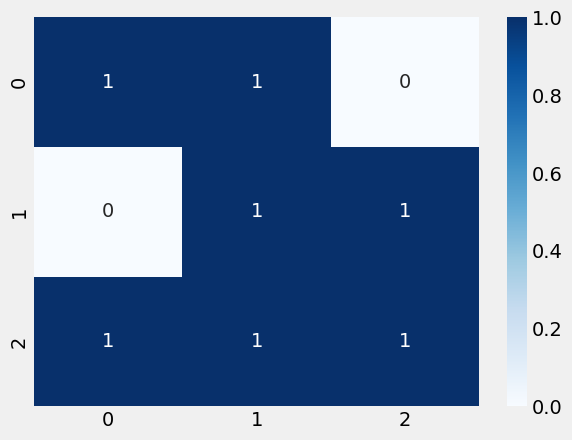

In [82]:
y_true = ["해", "구름", "비", "해", "해", "구름", "비"]
y_pred = ["구름", "비", "해", "해", "비", "구름", "비"]

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_true, y_pred)

# plot confusion matrix
import seaborn as sns

sns.heatmap(cm, annot=True, cmap='Blues', fmt='d')
plt.show()


클래스들: ['구름', '해', '비']


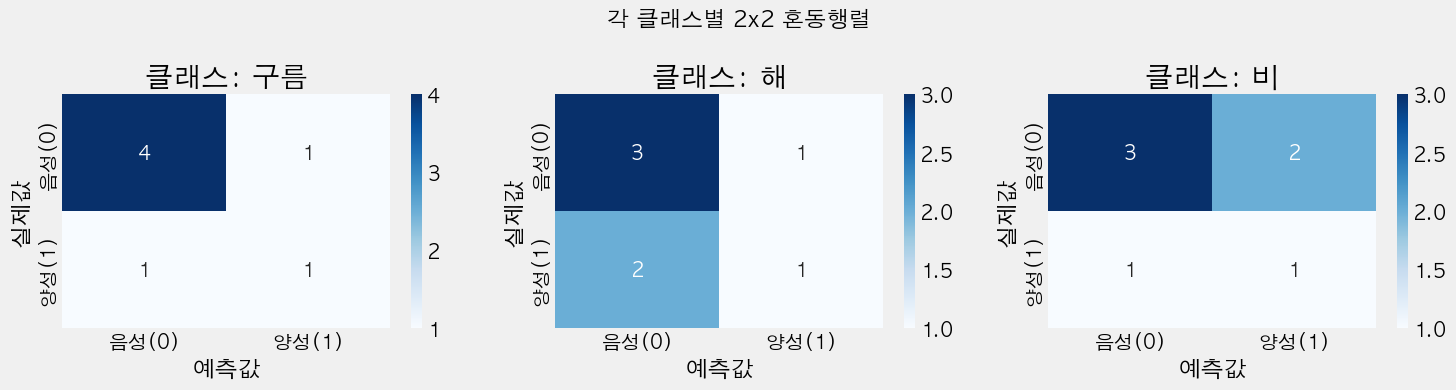


각 클래스별 혼동행렬 상세:

구름 클래스:
True Negative (TN): 4
False Positive (FP): 1
False Negative (FN): 1
True Positive (TP): 1
혼동행렬:
[[4 1]
 [1 1]]

해 클래스:
True Negative (TN): 3
False Positive (FP): 1
False Negative (FN): 2
True Positive (TP): 1
혼동행렬:
[[3 1]
 [2 1]]

비 클래스:
True Negative (TN): 3
False Positive (FP): 2
False Negative (FN): 1
True Positive (TP): 1
혼동행렬:
[[3 2]
 [1 1]]


In [84]:
"""
Q3 각 클래스별로, 2X2 혼동행렬(confusion matrix)를 그리시오.
"""
# 애플고딕 사용
plt.rcParams['font.family'] = 'AppleGothic'
# 고유한 클래스들 추출
classes = list(set(y_true + y_pred))
print("클래스들:", classes)

# 각 클래스별로 2x2 혼동행렬 생성
fig, axes = plt.subplots(1, len(classes), figsize=(15, 4))
fig.suptitle('각 클래스별 2x2 혼동행렬', fontsize=16, fontweight='bold')

for i, class_name in enumerate(classes):
    # 현재 클래스를 양성(1), 나머지를 음성(0)으로 변환
    y_true_binary = [1 if label == class_name else 0 for label in y_true]
    y_pred_binary = [1 if label == class_name else 0 for label in y_pred]
    
    # 혼동행렬 계산
    cm = confusion_matrix(y_true_binary, y_pred_binary)
    
    # 혼동행렬 시각화
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
                xticklabels=['음성(0)', '양성(1)'], 
                yticklabels=['음성(0)', '양성(1)'],
                ax=axes[i])
    
    axes[i].set_title(f'클래스: {class_name}', fontweight='bold')
    axes[i].set_xlabel('예측값')
    axes[i].set_ylabel('실제값')

plt.tight_layout()
plt.show()

# 각 클래스별 혼동행렬 값 출력
print("\n각 클래스별 혼동행렬 상세:")
for class_name in classes:
    y_true_binary = [1 if label == class_name else 0 for label in y_true]
    y_pred_binary = [1 if label == class_name else 0 for label in y_pred]
    
    cm = confusion_matrix(y_true_binary, y_pred_binary)
    tn, fp, fn, tp = cm.ravel()
    
    print(f"\n{class_name} 클래스:")
    print(f"True Negative (TN): {tn}")
    print(f"False Positive (FP): {fp}")
    print(f"False Negative (FN): {fn}")
    print(f"True Positive (TP): {tp}")
    print(f"혼동행렬:\n{cm}")

In [85]:
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix

# 주어진 데이터
y_true = ["해", "구름", "비", "해", "해", "구름", "비"] 
y_pred = ["구름", "비", "해", "해", "비", "구름", "비"]

# 고유한 클래스들 추출
classes = list(set(y_true + y_pred))
print("클래스들:", classes)
print("=" * 60)

# 각 클래스별 성능 지표 계산
results = {}

for class_name in classes:
    # 현재 클래스를 양성(1), 나머지를 음성(0)으로 변환
    y_true_binary = [1 if label == class_name else 0 for label in y_true]
    y_pred_binary = [1 if label == class_name else 0 for label in y_pred]
    
    # 혼동행렬 계산
    cm = confusion_matrix(y_true_binary, y_pred_binary)
    tn, fp, fn, tp = cm.ravel()
    
    # 각 지표 계산
    accuracy = (tp + tn) / (tp + tn + fp + fn)
    precision = tp / (tp + fp) if (tp + fp) > 0 else 0
    recall = tp / (tp + fn) if (tp + fn) > 0 else 0
    fpr = fp / (fp + tn) if (fp + tn) > 0 else 0  # False Positive Rate
    f1 = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0
    jaccard = tp / (tp + fp + fn) if (tp + fp + fn) > 0 else 0  # Jaccard Index
    
    results[class_name] = {
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'fpr': fpr,
        'f1': f1,
        'jaccard': jaccard
    }
    
    print(f"{class_name} 클래스:")
    print(f"  정확도(Accuracy): {accuracy:.4f}")
    print(f"  정밀도(Precision): {precision:.4f}")
    print(f"  재현율(Recall): {recall:.4f}")
    print(f"  오검출율(FPR): {fpr:.4f}")
    print(f"  F1 Score: {f1:.4f}")
    print(f"  Jaccard Index: {jaccard:.4f}")
    print("-" * 40)

# 전체 정확도 계산 (다중 클래스 전체 정확도)
overall_accuracy = accuracy_score(y_true, y_pred)

# Macro 평균 계산
macro_precision = np.mean([results[cls]['precision'] for cls in classes])
macro_recall = np.mean([results[cls]['recall'] for cls in classes])
macro_fpr = np.mean([results[cls]['fpr'] for cls in classes])
macro_f1 = np.mean([results[cls]['f1'] for cls in classes])
macro_jaccard = np.mean([results[cls]['jaccard'] for cls in classes])

print("=" * 60)
print("MACRO 평균 결과:")
print(f"전체 정확도(Overall Accuracy): {overall_accuracy:.4f}")
print(f"Macro 평균 정밀도: {macro_precision:.4f}")
print(f"Macro 평균 재현율: {macro_recall:.4f}")
print(f"Macro 평균 오검출율(FPR): {macro_fpr:.4f}")
print(f"Macro 평균 F1 Score: {macro_f1:.4f}")
print(f"Macro 평균 Jaccard Index: {macro_jaccard:.4f}")

# 결과를 표 형태로 정리
print("\n" + "=" * 80)
print("결과 요약표")
print("=" * 80)
print(f"{'클래스':<10} {'정확도':<8} {'정밀도':<8} {'재현율':<8} {'FPR':<8} {'F1':<8} {'Jaccard':<8}")
print("-" * 80)

for class_name in classes:
    print(f"{class_name:<10} {results[class_name]['accuracy']:<8.4f} "
          f"{results[class_name]['precision']:<8.4f} {results[class_name]['recall']:<8.4f} "
          f"{results[class_name]['fpr']:<8.4f} {results[class_name]['f1']:<8.4f} "
          f"{results[class_name]['jaccard']:<8.4f}")

print("-" * 80)
print(f"{'Macro 평균':<10} {'-':<8} {macro_precision:<8.4f} {macro_recall:<8.4f} "
      f"{macro_fpr:<8.4f} {macro_f1:<8.4f} {macro_jaccard:<8.4f}")
print(f"{'전체 정확도':<10} {overall_accuracy:<8.4f} {'-':<8} {'-':<8} {'-':<8} {'-':<8} {'-':<8}")

클래스들: ['구름', '해', '비']
구름 클래스:
  정확도(Accuracy): 0.7143
  정밀도(Precision): 0.5000
  재현율(Recall): 0.5000
  오검출율(FPR): 0.2000
  F1 Score: 0.5000
  Jaccard Index: 0.3333
----------------------------------------
해 클래스:
  정확도(Accuracy): 0.5714
  정밀도(Precision): 0.5000
  재현율(Recall): 0.3333
  오검출율(FPR): 0.2500
  F1 Score: 0.4000
  Jaccard Index: 0.2500
----------------------------------------
비 클래스:
  정확도(Accuracy): 0.5714
  정밀도(Precision): 0.3333
  재현율(Recall): 0.5000
  오검출율(FPR): 0.4000
  F1 Score: 0.4000
  Jaccard Index: 0.2500
----------------------------------------
MACRO 평균 결과:
전체 정확도(Overall Accuracy): 0.4286
Macro 평균 정밀도: 0.4444
Macro 평균 재현율: 0.4444
Macro 평균 오검출율(FPR): 0.2833
Macro 평균 F1 Score: 0.4333
Macro 평균 Jaccard Index: 0.2778

결과 요약표
클래스        정확도      정밀도      재현율      FPR      F1       Jaccard 
--------------------------------------------------------------------------------
구름         0.7143   0.5000   0.5000   0.2000   0.5000   0.3333  
해          0.5714   0.5000   0.3333   0